In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [157]:
BASE_PATH = "~/Code/FP-MAX-LSHADE/results/generations/"

In [158]:
Seeds = { 
          10 : [512, 166, 538, 894, 449, 195, 88, 144, 903, 577, 830, 827, 537, 179, 660, 844, 999, 858, 744, 740, 221, 443, 219, 484, 5, 23, 465, 864, 245, 523],
          30 : [449, 144, 830, 179, 999, 740, 219, 23, 245, 588, 746, 967, 275, 389, 561, 775, 250, 121, 152, 696, 691, 836, 51, 371, 881, 594, 362, 511, 416, 372],
          50 : [903, 179, 744, 484, 245, 11, 450, 389, 167, 947, 152, 862, 283, 371, 431, 439, 416, 112, 613, 184, 46, 499, 890, 587, 217, 942, 808, 633, 174, 404],
          100 : [744, 245, 450, 167, 152, 283, 431, 416, 613, 46, 890, 217, 808, 174, 727, 615, 347, 455, 423, 846, 629, 729, 48, 806, 401, 859, 3, 67, 351, 232]
        }

In [165]:
# Parameters:
D = 100
function = 2
seed = Seeds[D][function-1]

elite_rate = 0.1
disc_step = 0.0098
support = 90
gen_step = 20
sol_fill_strategy = "rand"

config = f"--fpmaxlshade --crossgen --insert --er {elite_rate} --gs {gen_step} --h {disc_step} --s {support} --sf  --analysis --{sol_fill_strategy} --10percpop "
filepath = BASE_PATH +  f"FP-MAX-LSHADE/{config}/D{D}/cec-f{function}/s{seed}/dm-effect.csv"

In [166]:
df = pd.read_csv(filepath, sep=';')

In [62]:
df.PD /= df.PD.iloc[0]
df.PSR /= df.PSR.iloc[0]

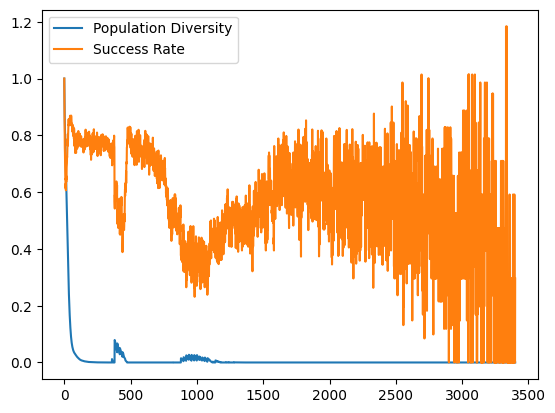

In [63]:
df.PD.plot(label="Population Diversity")
df.PSR.plot(label="Success Rate")
plt.legend()

In [167]:
df = pd.read_csv(filepath, sep=';')
m_df = df.dropna()

In [168]:
m_df.MSR *= 100

/tmp/ipykernel_208765/1972038129.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_df.MSR *= 100


In [169]:
df.PSR /= df.PSR.max()
df.PSR *= 100

df.PD /= df.PD.max()
df.PD *= 100

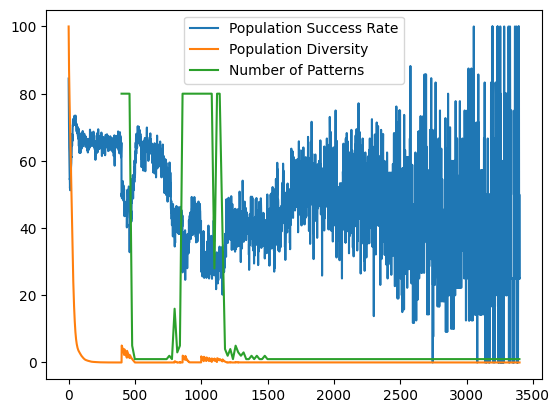

In [171]:
df.PSR.plot(label="Population Success Rate")
df.PD.plot(label="Population Diversity")
m_df.NP[m_df.NP < 1000].plot(label="Number of Patterns")
#m_df.APS.plot(label="Avg. Pattern Size")
#m_df.MSR.plot()
plt.legend()

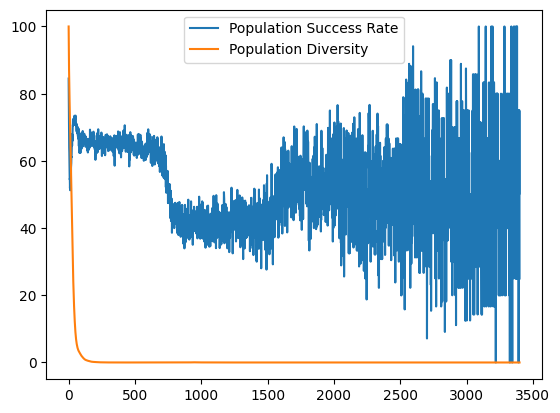

In [146]:
df.PSR.plot(label="Population Success Rate")
df.PD.plot(label="Population Diversity")
#m_df.NP[m_df.NP < 300].plot(label="Number of Patterns")
m_df.APS.plot(label="Avg. Pattern Size")
#m_df.MSR.plot()
plt.legend()

# LSHADE (no pattern influence):

In [130]:
# Number of Patterns:
print("MIN | MAX | AVG")
print(f"{m_df.NP.min()} | {m_df.NP.max()} | {m_df.NP.mean():.5}")

MIN | MAX | AVG
1.0 | 4928.0 | 50.883


In [106]:
# Size of Patterns:
print("MIN | MAX | AVG")
print(f"{m_df.APS.min()} | {m_df.APS.max()} | {m_df.APS.mean():.5}")

MIN | MAX | AVG
nan | nan | nan


In [26]:
# Population Success Rate:
print("MIN | MAX | AVG")
print(f"{m_df.PSR.min()} | {m_df.PSR.max()} | {m_df.PSR.mean():.5}")

MIN | MAX | AVG
0.0 | 0.68541 | 0.36041


In [25]:
# Patterns Success Rate:
print("MIN | MAX | AVG")
print(f"{m_df.MSR.min()} | {m_df.MSR.max()} | {m_df.MSR.mean():.5}")

MIN | MAX | AVG
0.0 | 100.0 | 15.502


In [53]:
m_df[m_df.NP >= 180]

,G,PD,NP,APS,MSR,PSR
379,380,25.9106,383.0,9.31854,0.0000,0.114411
399,400,374065.0000,245.0,27.37960,94.6939,0.164196
439,440,159081.0000,308.0,25.01620,32.7922,0.062500
479,480,173057.0000,4132.0,8.13408,18.0263,0.000000


In [ ]:
avg cost = 10392.3
avg cost = 323.79